<a href="https://colab.research.google.com/github/jppp6/CampQMIND2021/blob/main/hackathon_groupD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/ArianaBakhtyari/CampQMIND2021.git

fatal: destination path 'CampQMIND2021' already exists and is not an empty directory.


In [300]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [301]:
df_train = pd.read_csv('/content/CampQMIND2021/Hackathons/Intro_Hackathon/titanic_train.csv')  # reading train data into "df_train"
df_test = pd.read_csv('/content/CampQMIND2021/Hackathons/Intro_Hackathon/titanic_train.csv')     # reading test data into "df_test"

In [302]:
df_train.head(10) # print the first 10 rows of the training set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,294,0,3,"Haas, Miss. Aloisia",female,24.0,0,0,349236,8.8500,NaN,S
1,398,0,2,"McKane, Mr. Peter David",male,46.0,0,0,28403,26.0000,NaN,S
2,384,1,1,"Holverson, Mrs. Alexander Oskar (Mary Aline To...",female,35.0,1,0,113789,52.0000,NaN,S
3,133,0,3,"Robins, Mrs. Alexander A (Grace Charity Laury)",female,47.0,1,0,A/5. 3337,14.5000,NaN,S
4,267,0,3,"Panula, Mr. Ernesti Arvid",male,16.0,4,1,3101295,39.6875,NaN,S
5,628,1,1,"Longley, Miss. Gretchen Fiske",female,21.0,0,0,13502,77.9583,D9,S
6,192,0,2,"Carbines, Mr. William",male,19.0,0,0,28424,13.0000,NaN,S
7,866,1,2,"Bystrom, Mrs. (Karolina)",female,42.0,0,0,236852,13.0000,NaN,S
8,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
9,826,0,3,"Flynn, Mr. John",male,NaN,0,0,368323,6.9500,NaN,Q


In [303]:
df_train.shape # print the number of rows and columns in the training set

(711, 12)

In [304]:
df_train.columns # print column names for training set

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [305]:
df_train.isnull().sum()  # statistical summary of training dataset columns

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            151
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          549
Embarked         1
dtype: int64

Important columns:
Sex
Age
Name


In [306]:
#Get pronoun into numerical values
def isMr(name):
  if "mr." in name.lower():
    return 1
  return 0

def isMrs(name):
  if "mrs." in name.lower():
    return 1
  return 0

def isMiss(name):
  if "miss" in name.lower():
    return 1
  return 0


In [307]:
#Dop Cabin Column because a lot of data is missing
df_train = df_train.drop(['Cabin'], axis = 1)
df_test = df_test.drop(['Cabin'], axis = 1)
#Drop ticket  because it likely does not have a big impact on if they survived
df_train = df_train.drop(['Ticket'], axis = 1)
df_test = df_test.drop(['Ticket'], axis = 1)
#Drop passenger IDbecause it likely does not have a big impact on if they survived
df_train = df_train.drop(['Fare'], axis = 1)
df_test = df_test.drop(['Fare'], axis = 1)
#Filling in missing collunms of age with the average age
df_train['Age'].fillna(df_train['Age'].mean(), inplace=True)
df_test['Age'].fillna(df_test['Age'].mean(), inplace=True)
#Filling in missing collunms of embarked with S
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace=True)
df_test['Embarked'].fillna(df_test['Embarked'].mode()[0], inplace=True)
#Combined parch and sibsp into family size including themselves
df_train['family_size'] = df_train['Parch'] + df_train['SibSp'] + 1
df_test['family_size'] = df_test['Parch'] + df_test['SibSp'] + 1
df_train = df_train.drop(['Parch','SibSp'], axis = 1)
df_test = df_test.drop(['Parch','SibSp'], axis = 1)
#Split age into bins
df_train['Age_bin'] = pd.cut(df_train['Age'], bins = [0, 12, 20, 40, 120], labels=['Children', 'Teenage', 'Adult', 'Elder'])
df_test['Age_bin']   = pd.cut(df_test['Age'],   bins = [0, 12, 20, 40, 120], labels=['Children', 'Teenage', 'Adult', 'Elder'])
#Drop age column now that we have bins
df_train = df_train.drop(['Age'], axis = 1)
df_test = df_test.drop(['Age'], axis = 1)
#Split colunm into numerical values
df_train = pd.get_dummies(df_train, columns = ["Sex","Age_bin","Embarked","Pclass"], prefix = ["Sex","Age_bin","Embarked","Pclass"])
df_test  = pd.get_dummies(df_test, columns = ["Sex","Age_bin","Embarked","Pclass"], prefix = ["Sex","Age_bin","Embarked","Pclass"])

df_train['Mr'] = df_train['Name'].map(isMr)
df_train['Mrs'] = df_train['Name'].map(isMrs)
df_train['Miss'] = df_train['Name'].map(isMiss)
df_test['Mr'] = df_test['Name'].map(isMr)
df_test['Mrs'] = df_test['Name'].map(isMrs)
df_test['Miss'] = df_test['Name'].map(isMiss)
df_train = df_train.drop(['Name'], axis=1)
df_test = df_test.drop(['Name'], axis=1)

In [308]:
df_train.head(1)

,PassengerId,Survived,family_size,Sex_female,Sex_male,Age_bin_Children,Age_bin_Teenage,Age_bin_Adult,Age_bin_Elder,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Mr,Mrs,Miss
0,294,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5]),
 <a list of 18 Text major ticklabel objects>)

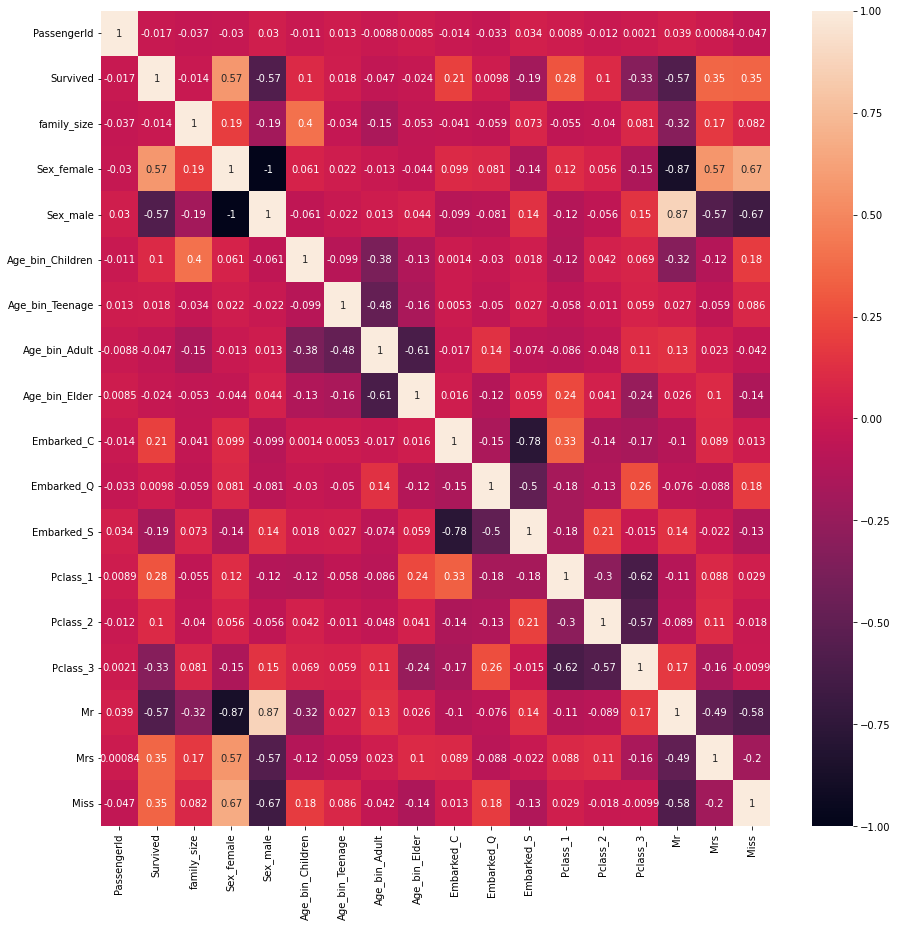

In [309]:
plt.figure(figsize=(15,15))
sns.heatmap(df_train.corr(),annot = True, cbar = True)
plt.xticks(rotation=90)
plt.yticks(rotation = 0)

In [310]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score   
data_features = df_train.drop("Survived",axis=1)
assesed_feature = df_train["Survived"]
df_test=df_test.drop("Survived",axis=1)

X_train,X_test,y_train,y_test = train_test_split(data_features,assesed_feature,test_size=0.3,random_state=42)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

prediction_lr=model.predict(X_test)
print('The accuracy of the Logistic Regression is', round(accuracy_score(prediction_lr, y_test)*100,2))


The accuracy of the Logistic Regression is 83.64


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [311]:
prediction_lr=model.predict(df_test)

In [312]:
submission = pd.DataFrame({'PassengerId':df_test['PassengerId'],'Survived':prediction_lr})

submission.to_csv('./titanic_submission_group-D.csv',index = False)